In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (_,_) = fashion_mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
print(x_train.shape)

(60000, 28, 28)


In [6]:
x_train = np.expand_dims(x_train, axis=-1)
print(x_train.shape)

(60000, 28, 28, 1)


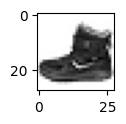

In [7]:
plt.figure(figsize=(1,1))
sample_image = x_train[0].reshape(28,28)
plt.imshow(sample_image, cmap='Greys')

In [8]:
BUFFER_SIZE = 60000
BATCH_SIZE = 128
EPOCHS = 100
NOISE_DIM = 100
NUM_CLASSES = 10
EMBED_DIM = 100

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [10]:
def build_generator():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(NOISE_DIM,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Reshape((7,7,256)))

  model.add(layers.Conv2DTranspose(256, (5,5), strides = (1,1), padding = 'same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(128, (5,5), strides = (1,1), padding = 'same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64, (5,5), strides = (2,2), padding = 'same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(32, (5,5), strides = (2,2), padding = 'same', use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1, (5,5), strides = (1,1), padding = 'same', use_bias=False, activation='tanh'))

  noise_input = layers.Input(shape=(NOISE_DIM,))
  labels_input = layers.Input(shape=(1,), dtype = tf.int32)
  labels_embedding = layers.Embedding(NUM_CLASSES, EMBED_DIM)(labels_input)
  labels_embedding = layers.Flatten()(labels_embedding)
  merged_input = layers.Multiply()([noise_input, labels_embedding])
  generated_image = model(merged_input)

  return tf.keras.Model([noise_input, labels_input], generated_image)


In [11]:
generator = build_generator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
generator.get_layer('sequential').summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 256)      │     1,638,400 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 1)      │           800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,020,896 (15.34 MB)

 Trainable params: 3,994,848 (15.24 MB)

 Non-trainable params: 26,048 (101.75 KB)

In [39]:
def build_discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(32, (5,5),  strides = (1,1), padding = 'same', input_shape=[28,28,2]))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(64, (5,5),  strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(128, (5,5),  strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(256, (5,5),  strides = (1,1), padding = 'same'))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))

  input_image = layers.Input(shape=[28,28,1])
  labels_input = layers.Input(shape=(1,), dtype = tf.int32)
  labels_embedding = layers.Embedding(NUM_CLASSES, 28*28)(labels_input)
  labels_embedding = layers.Reshape((28,28,1))(labels_embedding)

  merged_input = layers.Concatenate()([input_image, labels_embedding])
  validity = model(merged_input)

  return tf.keras.Model([input_image, labels_input], validity)

  return model

In [40]:
discriminator = build_discriminator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
discriminator.summary()

Model: "functional_86"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 784)    │      7,840 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 28, 28, 1) │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 28, 2) │          0 │ input_layer_10[0… │
│ (Concatenate)       │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 1)         │  1,277,985 │ concatenate_1[0]… │
│ (Sequential)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,285,825 (4.91 MB)

 Trainable params: 1,285,825 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
discriminator.get_layer('sequential_6').summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │       200,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,277,985 (4.88 MB)

 Trainable params: 1,277,985 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def gen_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def disc_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

In [46]:
gen_optimizer = tf.keras.optimizers.Adam(0.0001)
disc_optimizer = tf.keras.optimizers.Adam(0.00001)

In [47]:
seed_noise = tf.random.normal([NUM_CLASSES, NOISE_DIM])
seed_labels = tf.constant(np.arange(NUM_CLASSES).reshape(-1, 1))

In [48]:
# Training step
@tf.function
def train_step(images, labels):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    random_labels = tf.random.uniform([BATCH_SIZE, 1], minval=0, maxval=NUM_CLASSES, dtype=tf.int32)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, random_labels], training=True)

        real_output = discriminator([images, labels], training=True)
        fake_output = discriminator([generated_images, random_labels], training=True)

        gen_loss_val = gen_loss(fake_output)
        disc_loss_val = disc_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss_val, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss_val, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss_val, disc_loss_val

def generate_and_save_images(model, epoch, test_input, test_labels):
    predictions = model([test_input, test_labels], training=False)
    fig = plt.figure(figsize=(10, 1))

    for i in range(predictions.shape[0]):
        plt.subplot(1, NUM_CLASSES, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_epoch_{epoch:03d}.png')
    plt.close()

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch, label_batch in dataset:
            gl, dl = train_step(image_batch, tf.expand_dims(label_batch, 1))

        print(f'Epoch {epoch + 1}, Gen Loss: {gl:.4f}, Disc Loss: {dl:.4f}')
        generate_and_save_images(generator, epoch + 1, seed_noise, seed_labels)

In [49]:
train(train_dataset, EPOCHS)

Epoch 1, Gen Loss: 0.6574, Disc Loss: 1.4384
Epoch 2, Gen Loss: 0.7023, Disc Loss: 1.3597
Epoch 3, Gen Loss: 0.6756, Disc Loss: 1.3884
Epoch 4, Gen Loss: 0.5966, Disc Loss: 1.4574
Epoch 5, Gen Loss: 0.7284, Disc Loss: 1.3645
Epoch 6, Gen Loss: 0.5602, Disc Loss: 1.5278
Epoch 7, Gen Loss: 0.7696, Disc Loss: 1.4091
Epoch 8, Gen Loss: 0.6321, Disc Loss: 1.4018
Epoch 9, Gen Loss: 0.6808, Disc Loss: 1.4523
Epoch 10, Gen Loss: 0.6274, Disc Loss: 1.3872
Epoch 11, Gen Loss: 0.6908, Disc Loss: 1.3862
Epoch 12, Gen Loss: 0.6723, Disc Loss: 1.4362
Epoch 13, Gen Loss: 0.8231, Disc Loss: 1.3096
Epoch 14, Gen Loss: 1.3139, Disc Loss: 0.8981
Epoch 15, Gen Loss: 0.8595, Disc Loss: 1.2220
Epoch 16, Gen Loss: 0.7238, Disc Loss: 1.2925
Epoch 17, Gen Loss: 0.7057, Disc Loss: 1.3464
Epoch 18, Gen Loss: 0.7312, Disc Loss: 1.4161
Epoch 19, Gen Loss: 0.8760, Disc Loss: 1.2983
Epoch 20, Gen Loss: 0.7619, Disc Loss: 1.3755
Epoch 21, Gen Loss: 0.7527, Disc Loss: 1.3906
Epoch 22, Gen Loss: 0.6617, Disc Loss: 1.34

In [71]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[-0.21910214]]


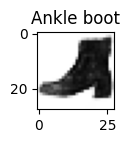

In [139]:
noise = np.random.normal(0, 1, (1, NOISE_DIM))
labels = np.array([[9]])
generated_image = generator.predict([noise, labels])

plt.figure(figsize=(1,1))
sample_image = generated_image.reshape(28,28,1)
plt.imshow(sample_image, cmap='Greys')
plt.title(f'{fashion_mnist_labels[labels[0][0]]}')
predicted_score = discriminator.predict([generated_image, labels])
print(predicted_score)

In [86]:
import joblib
joblib.dump(generator, "generator.pkl")
joblib.dump(discriminator, "discriminator.pkl")

['discriminator.pkl']